In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

print(os.listdir("C:/Users/DELL/Downloads/SL"))



['HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']


In [3]:
df_skin = pd.read_csv("C:/Users/DELL/Downloads/SL/HAM10000_metadata.csv")

df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

df_skin['lesion_type']=df_skin['dx'].map(lesion_type_dict)
df_skin['lesion_ID'] = df_skin['dx'].map(lesion_ID_dict)

print('Total number of images',len(df_skin))
print('The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels')

df_skin['lesion_type'].value_counts()

Total number of images 10015
The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels


Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: lesion_type, dtype: int64

Type of fname_images[0]: <class 'str'>, Value: ISIC_0027419


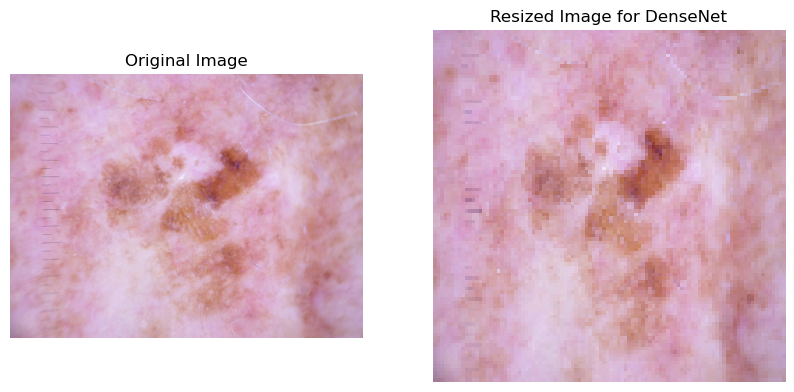

In [5]:
import numpy as np
import cv2
from cv2 import imread, resize
import matplotlib.pyplot as plt
import os

# Assuming df_skin is already defined and contains the 'image_id' column
fname_images = np.array(df_skin['image_id'])

# Debugging: Print the type and value of fname_images[0]
print(f"Type of fname_images[0]: {type(fname_images[0])}, Value: {fname_images[0]}")

# Construct the file path correctly, ensuring fname_images[0] is treated as a string
try:
    image_id = str(fname_images[0])  # Ensure it is a string
    file_to_read = os.path.join("C:/Users/DELL/Downloads/SL/HAM10000_images_part_1", f"{image_id}.jpg")

    # Read the image
    img = imread(file_to_read)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Unable to load image at {file_to_read}")
    else:
        # Resize the image
        img2 = resize(img, (100, 100))

        # Plotting the original and resized images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img[:, :, ::-1])  # Convert BGR to RGB
        plt.title('Original Image')
        plt.axis('off')  # Hide axes

        plt.subplot(1, 2, 2)
        plt.imshow(img2[:, :, ::-1])  # Convert BGR to RGB
        plt.title('Resized Image for DenseNet')
        plt.axis('off')  # Hide axes

        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")




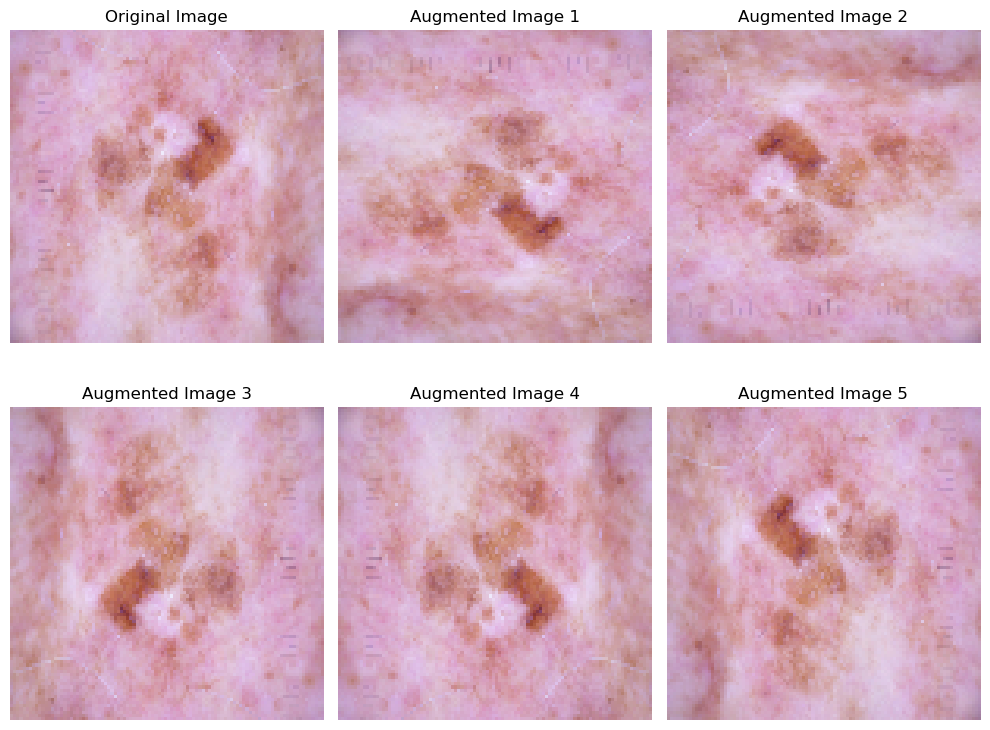

ISIC_0027419.jpg


In [6]:
import cv2
import matplotlib.pyplot as plt

def produce_new_img(img2):
    # Produce new images by rotating and flipping the original one
    imga = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2, cv2.ROTATE_180)
    imgd = cv2.flip(img2, 0)  # Flip vertically
    imge = cv2.flip(img2, 1)  # Flip horizontally
    return imga, imgb, imgc, imgd, imge

# Assuming img2 is defined, and fname_images is a list of filenames
new_img = produce_new_img(img2)

plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(img2[..., ::-1])  # Convert BGR to RGB for displaying
plt.axis('off')  # Turn off axis for cleaner look
plt.title("Original Image")

for i in range(5):
    plt.subplot(2, 3, 2 + i)
    plt.imshow(new_img[i][..., ::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.title(f"Augmented Image {i + 1}")

plt.tight_layout()
plt.show()

# If you want to concatenate the filename for some purpose, do it like this:
filename = str(fname_images[0]) + '.jpg'
print(filename)  # or use it as needed


In [7]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

X = []
y = []

# Define the paths
path1 = "C:/Users/DELL/Downloads/SL/HAM10000_images_part_1"
path2 = "C:/Users/DELL/Downloads/SL/HAM10000_images_part_2"

# Load image lists
lista1 = os.listdir(path1)
lista2 = os.listdir(path2)

def load_images_from_folder(folder, folder_path):
    for i, fname_image in enumerate(folder):
        fname_ID = fname_image.replace('.jpg', '')
        
        # Features
        file_to_read = os.path.join(folder_path, fname_image)  # Correctly use folder_path
        
        try:
            img = imread(file_to_read)
            if img.size == 0:
                print(f"Warning: {file_to_read} is empty or could not be read.")
                continue
            
            img2 = resize(img, (100, 100))
            X.append(img2)
            
            # Targets
            output = np.array(df_skin[df_skin['image_id'] == fname_ID].lesion_ID)
            y.append(output[0])
            
            # Augmentation for classes 1-6
            if output[0] != 0:  # Ensure output is the first element
                new_img = produce_new_img(img2)
                for augmented_img in new_img:
                    X.append(augmented_img)
                    y.append(output[0])
            
            if i % 100 == 0:
                print(f"{len(X)} images loaded from {folder_path}")
        
        except Exception as e:
            print(f"Error loading {file_to_read}: {e}")

# Import images from both folders
load_images_from_folder(lista1, path1)
load_images_from_folder(lista2, path2)

print("Total images loaded:", len(X))


1 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
261 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
571 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
816 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
1071 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
1346 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
1596 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
1876 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
2121 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
2336 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
2576 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
2841 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
3076 images loaded from C:/Users/DELL/Downloads/SL/HAM10000_images_part_1
3371 images loaded from C:/Users/DELL/Downlo

In [8]:
import numpy as np
from keras.utils import to_categorical

# Convert lists to NumPy arrays with dtype float32
X = np.array(X, dtype=np.float32)  # Change to float32 to reduce memory usage
y = np.array(y)

# Check the unique values in y to ensure the correct number of classes
num_classes = len(np.unique(y))

# One-hot encode the labels
y_train = to_categorical(y, num_classes=num_classes)

# Output shapes for verification
print("X shape:", X.shape)
print("y shape:", y.shape)
print("One-hot encoded y_train shape:", y_train.shape)



X shape: (26565, 100, 100, 3)
y shape: (26565,)
One-hot encoded y_train shape: (26565, 7)


In [9]:
from sklearn.model_selection import train_test_split

# split in 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.33, random_state=50,stratify=y)


print('Train dataset shape',X_train.shape)
print('Test dataset shape',X_test.shape)

Train dataset shape (17798, 100, 100, 3)
Test dataset shape (8767, 100, 100, 3)


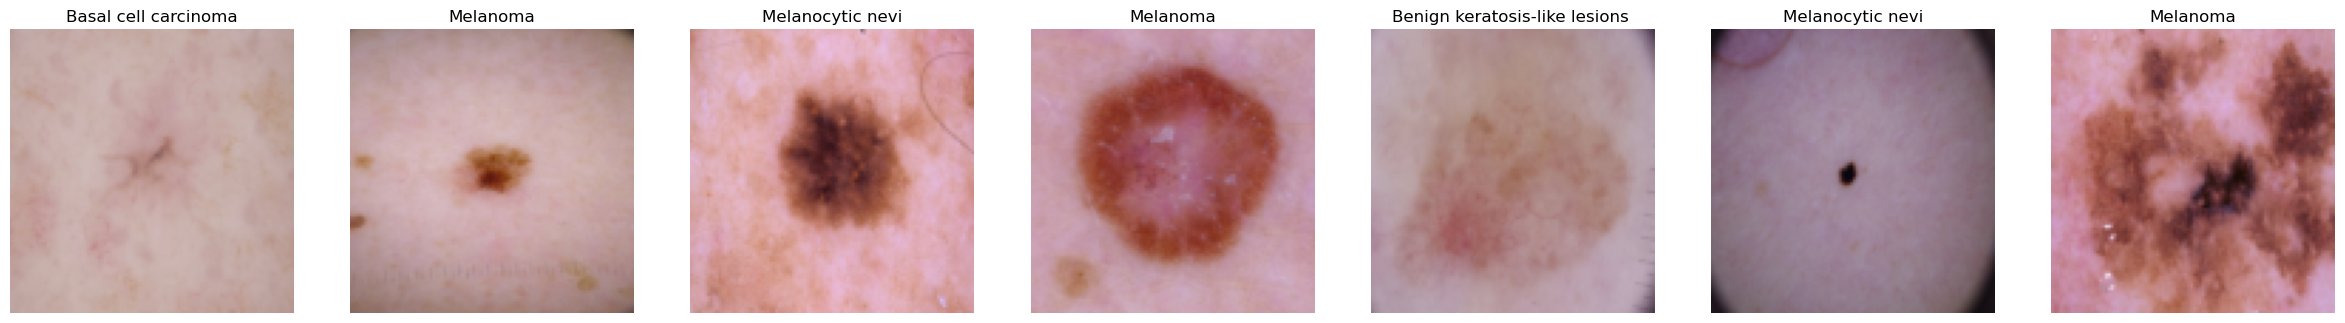

In [10]:
fig, ax = plt.subplots(1, 7, figsize=(30, 30))
for i in range(7):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(lesion_names[np.argmax(y_train[i])])

In [12]:
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dropout, Activation
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Flatten,Dense

In [13]:
from sklearn.utils.class_weight import compute_class_weight
y_id = np.array(df_skin['lesion_ID'])

# compute weights for the loss function, because the problem is unbalanced
class_weights = np.around(compute_class_weight(class_weight='balanced',classes=np.unique(y_id),y=y),2)
class_weights = dict(zip(np.unique(y_id),class_weights))

print('The problem is unbalanced. We need to provide class_weights ')
print(class_weights)

The problem is unbalanced. We need to provide class_weights 
{0: 0.57, 1: 0.57, 2: 0.58, 3: 1.23, 4: 1.93, 5: 4.45, 6: 5.5}


In [14]:
# building Neural Network

import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam

model = Sequential([
    
    # 1st convolutional layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 2nd convolutional layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 3rd convolutional layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    
    # 4th convolutional layer
    Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    
    # 5th convolutional layer
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    Flatten(),
    
    # 6th, Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # 7th Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # 8th output layer
    Dense(7, activation='softmax')
])

In [ ]:
# training
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

early_stopping_monitor = EarlyStopping(patience=100,monitor='val_accuracy')
model_checkpoint_callback = ModelCheckpoint(filepath='model.h5',
                                            save_weights_only=False,
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)
batch_size = 32
epochs = 100
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

datagen.fit(X_train)

history=model.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping_monitor,model_checkpoint_callback], validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/100
557/557 [==============================] - ETA: 0s - loss: 1.9830 - accuracy: 0.3555
Epoch 1: val_accuracy improved from -inf to 0.25265, saving model to model.h5


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


557/557 [==============================] - 337s 601ms/step - loss: 1.9830 - accuracy: 0.3555 - val_loss: 7.8095 - val_accuracy: 0.2527
Epoch 2/100
557/557 [==============================] - ETA: 0s - loss: 1.4231 - accuracy: 0.4490
Epoch 2: val_accuracy improved from 0.25265 to 0.54933, saving model to model.h5
557/557 [==============================] - 302s 541ms/step - loss: 1.4231 - accuracy: 0.4490 - val_loss: 1.2371 - val_accuracy: 0.5493
Epoch 3/100
557/557 [==============================] - ETA: 0s - loss: 1.3656 - accuracy: 0.4682
Epoch 3: val_accuracy did not improve from 0.54933
557/557 [==============================] - 289s 519ms/step - loss: 1.3656 - accuracy: 0.4682 - val_loss: 2.9268 - val_accuracy: 0.2634
Epoch 4/100
557/557 [==============================] - ETA: 0s - loss: 1.3272 - accuracy: 0.4826
Epoch 4: val_accuracy did not improve from 0.54933
557/557 [==============================] - 296s 531ms/step - loss: 1.3272 - accuracy: 0.4826 - val_loss: 1.6388 - val_acc

In [14]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

274/274 [==============================] - 1s 4ms/step - loss: 0.6086 - accuracy: 0.8192
Accuracy: 81.92%


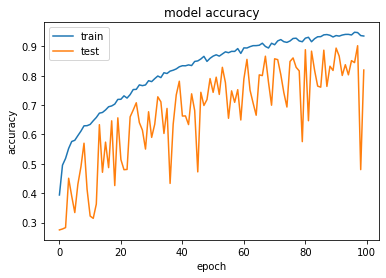

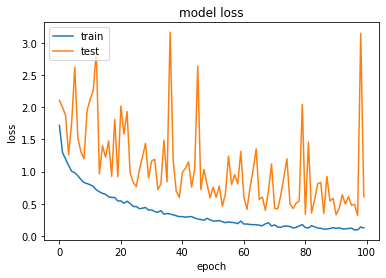

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 8767 	accurately-predicted-data: 7182 	 wrongly-predicted-data:  1585
Accuracy: 81.921 %


In [17]:
best_model = load_model('model.h5')

# compute predictions
y_pred_prob = np.around(best_model.predict(X_test),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = np.argmax(y_test,axis=1)

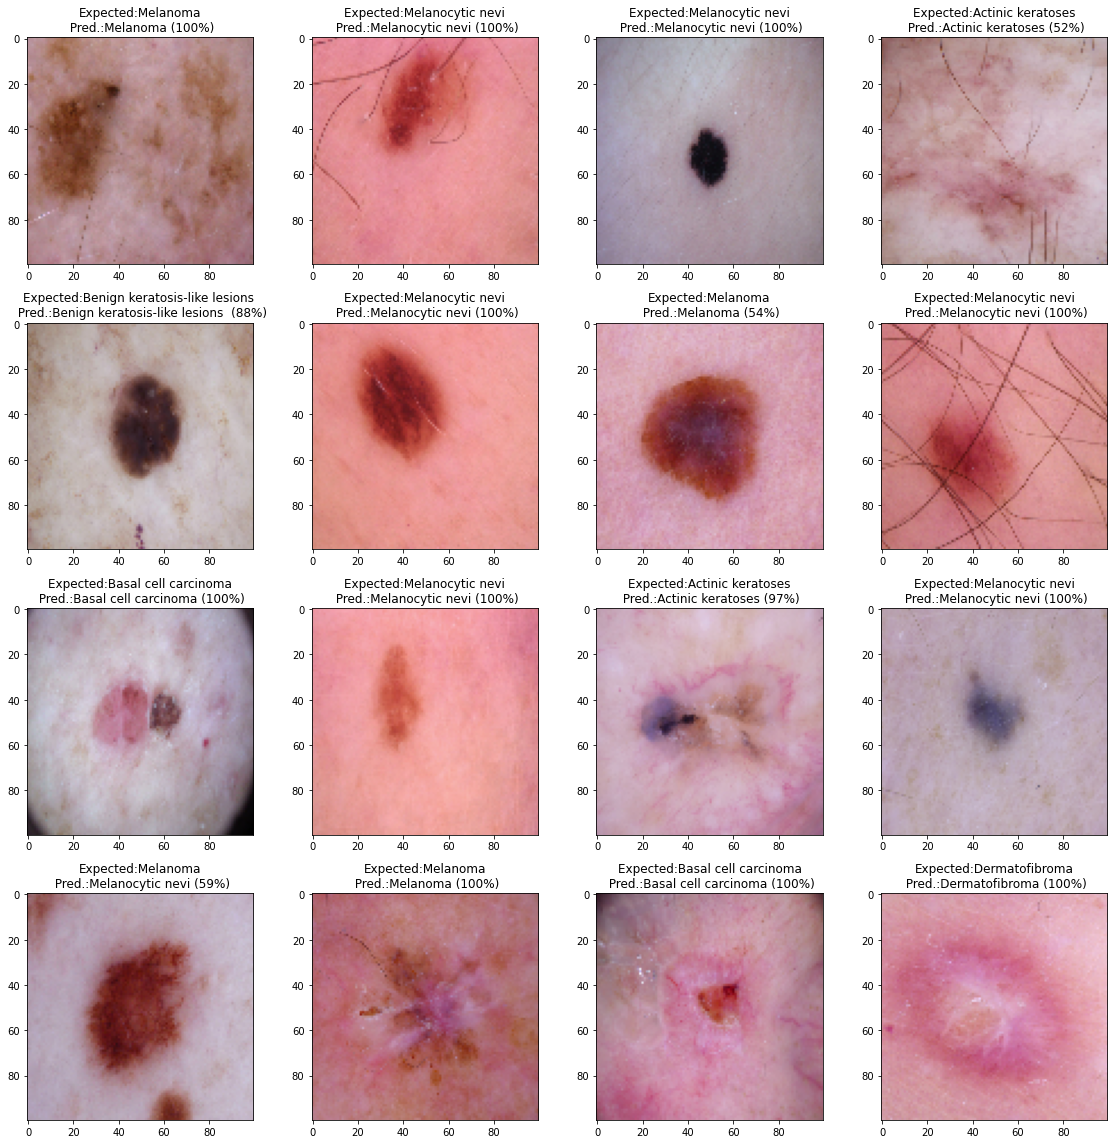

In [18]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [19]:
print('Accuracy for label equal to 0')
print(np.mean(y_test2[y_test2 == 0] == y_pred[y_test2 == 0]))

print('Accuracy for label different from 0')
print(np.mean(y_test2[y_test2 != 0] == y_pred[y_test2 != 0]))

Accuracy for label equal to 0
0.8572074107546317
Accuracy for label different from 0
0.9171498321635643


In [20]:
acc_tot= []

for i in range(7):
    acc_parz = round(np.mean(y_test2[y_test2 == i] == y_pred[y_test2 == i]),2)
    lab_parz = lesion_names[i]
    print('accuracy for',lab_parz,'=',acc_parz)
    acc_tot.append(acc_parz)

accuracy for Melanocytic nevi = 0.86
accuracy for Melanoma = 0.87
accuracy for Benign keratosis-like lesions  = 0.92
accuracy for Basal cell carcinoma = 0.97
accuracy for Actinic keratoses = 0.92
accuracy for Vascular lesions = 1.0
accuracy for Dermatofibroma = 0.96


In [21]:
acc_tot = np.array(acc_tot)
freq = np.unique(y_test2,return_counts=True)[1]

np.sum(acc_tot*freq)/np.sum(freq)

0.9016949925858332